In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from mplsoccer import VerticalPitch, Pitch
from matplotlib import lines
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import math

In [33]:
df = pd.read_csv('base_data.csv')
df = df.sort_values('eventTime')

In [34]:
# 패널티 에어리어로 투입된 시퀀스

in_p_area = df[
    ( (df['relativeEvent_x'] * 68) >= 13.84) &
    ( (df['relativeEvent_x'] * 68) <= 54.16) &
    ( (df['relativeEvent_y'] * 105) >= 88.85) &
    ( df['eventType'] == 'Pass')
]

in_p_area['relative_real_x'] = in_p_area['relativeEvent_x'] * 68
in_p_area['relative_real_y'] = in_p_area['relativeEvent_y'] * 105

in_p_area['real_x'] = in_p_area['x'] * 68
in_p_area['real_y'] = in_p_area['y'] * 105

C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\106602410.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\106602410.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\106602410.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [73]:
#in_p_area.to_csv('in_penalty_area_pass.csv')
in_p_area

,Unnamed: 0,eventType,outcome,cross,keyPass,assist,subEventType,bodyPart,xG,eventTypes,...,ballPosition_x,ballPosition_y,playerName,playerLastName,time_sec,time_min,relative_real_x,relative_real_y,real_x,real_y
995,995,Pass,Unsuccessful,True,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Michael,Krmencik,23.031,0.383850,33.351824,102.212040,62.163560,96.419295
1739,1739,Pass,Unsuccessful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Jan,Boril,83.490,1.391500,14.660732,96.930960,18.876392,74.886000
1832,1832,Pass,Successful,True,True,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Jakub,Jankto,92.990,1.549833,43.854356,99.338400,1.656521,91.740285
850,850,Pass,Unsuccessful,True,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Lukas,Masopust,168.227,2.803783,18.512320,96.888435,66.353720,92.666175
1839,1839,Pass,Successful,True,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Jakub,Jankto,172.529,2.875483,25.721476,103.068420,8.077720,96.677175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,2633,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Michal,Sadilek,5401.781,90.029683,50.937032,99.468495,59.521420,92.080695
2401,2401,Pass,Unsuccessful,True,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Petr,Sevcik,5403.642,90.060700,43.390732,98.617155,52.406716,102.373425
304,304,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Vladimir,Coufal,5470.032,91.167200,50.685092,101.866065,68.000000,94.609935
2639,2639,Pass,Unsuccessful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Michal,Sadilek,5471.508,91.191800,44.972548,98.771820,50.685092,101.866065


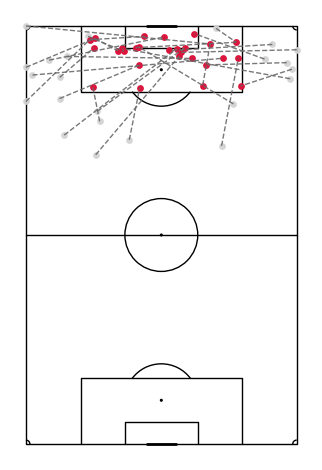

In [55]:
# 패널티 에어리어로 투입된 시퀀스 시각화

it_in_p = in_p_area[in_p_area['teamId'] == 10757]
cz_in_p = in_p_area[in_p_area['teamId'] == 10758]

pitch = VerticalPitch(pitch_type='uefa', pitch_length=105, pitch_width=68,
              axis=False, label=False, corner_arcs=True,
              pitch_color='white', line_color='black', linewidth=1)

fig, ax = pitch.draw()

ax.scatter(
    cz_in_p['real_x'], cz_in_p['real_y'], s=15, c='lightgrey', alpha=0.9
)

ax.scatter(
    cz_in_p['relative_real_x'], cz_in_p['relative_real_y'],
           s=15, c='crimson'
)

# 선 코드
for i in range(len(cz_in_p)):
    x_values = [cz_in_p['real_x'].iloc[i], cz_in_p['relative_real_x'].iloc[i]]
    y_values = [cz_in_p['real_y'].iloc[i], cz_in_p['relative_real_y'].iloc[i]]
    line = lines.Line2D(x_values, y_values,
                        color='dimgrey', alpha=0.9 ,linewidth=1, linestyle='--')
    ax.add_line(line)

plt.savefig('czech_in_parea.png')

In [48]:
it_in_p

,Unnamed: 0,eventType,outcome,cross,keyPass,assist,subEventType,bodyPart,xG,eventTypes,...,ballPosition_x,ballPosition_y,playerName,playerLastName,time_sec,time_min,relative_real_x,relative_real_y,real_x,real_y
1115,1115,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Nicolo,Barella,441.756,7.362600,40.341476,89.588415,40.947016,66.923955
2156,2156,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Domenico,Berardi,466.295,7.771583,36.399108,91.824180,42.820960,83.363280
688,688,Pass,Unsuccessful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Lorenzo,Insigne,469.519,7.825317,29.262712,92.714160,33.008492,90.763050
694,694,Pass,Successful,False,True,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Lorenzo,Insigne,530.921,8.848683,22.104896,96.899670,31.725400,74.561760
606,606,Pass,Unsuccessful,True,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Leonardo,Spinazzola,899.453,14.990883,35.726724,95.728290,11.855868,99.579795
2169,2169,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Domenico,Berardi,1010.926,16.848767,48.680520,102.760140,58.094984,94.346700
1130,1130,Pass,Unsuccessful,True,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Nicolo,Barella,1012.768,16.879467,44.489612,102.792375,48.680520,102.760140
706,706,Pass,Unsuccessful,True,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Lorenzo,Insigne,1334.209,22.236817,32.146660,95.881590,20.826224,75.442500
1138,1138,Pass,Successful,True,True,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Nicolo,Barella,1636.521,27.275350,26.967372,99.195600,52.933104,83.969865
2050,2050,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Alessandro,Florenzi,1699.651,28.327517,53.958204,95.799375,45.694776,85.541190


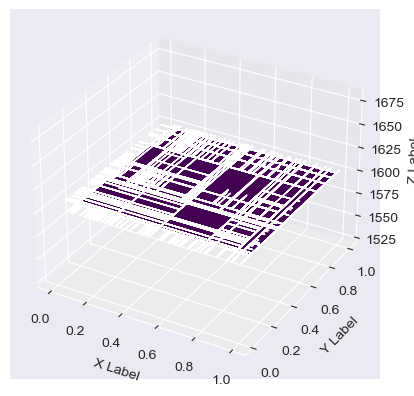

In [72]:
# 3d 이벤트 히트맵

it_df = df[df['teamId'] == 10757]
cz_df = df[df['teamId'] == 10758]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = it_df['x'].to_numpy()
Y = it_df['y'].to_numpy()

# meshgrid 생성
X, Y = np.meshgrid(X, Y)
Z = np.full_like(X, it_df['x'].count())

# 3D 표면 그리기
ax.plot_surface(X, Y, Z, cmap='viridis')

# 축 라벨 설정
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.savefig('3d_test.png')
plt.show()

In [35]:
# 패스 거리 및 각도

pass_df = df[df['eventType']=='Pass']

pass_df['relative_real_x'] = pass_df['relativeEvent_x'] * 68
pass_df['relative_real_y'] = pass_df['relativeEvent_y'] * 105

pass_df['real_x'] = pass_df['x'] * 68
pass_df['real_y'] = pass_df['y'] * 105

pass_df

C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\1064816015.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\1064816015.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\1064816015.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Unnamed: 0,eventType,outcome,cross,keyPass,assist,subEventType,bodyPart,xG,eventTypes,...,ballPosition_x,ballPosition_y,playerName,playerLastName,time_sec,time_min,relative_real_x,relative_real_y,real_x,real_y
0,0,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Antonin,Barak,0.996,0.016600,33.487892,42.341565,33.930640,52.517850
53,53,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Vladimir,Darida,2.716,0.045267,50.959744,31.602480,35.557608,41.209665
147,147,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Ondrej,Celustka,4.892,0.081533,64.115568,43.587390,53.376940,31.116540
188,188,Pass,Unsuccessful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Vladimir,Coufal,6.185,0.103083,43.344492,68.038320,64.115568,43.587390
306,306,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Leonardo,Bonucci,7.959,0.132650,21.932176,54.262425,24.241456,37.226910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,2653,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Rafael,Toloi,5489.130,91.485500,50.871004,44.907975,51.068544,24.810870
2600,2600,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Federico,Chiesa,5494.954,91.582567,41.804088,83.961570,47.224980,68.000310
2612,2612,Pass,Unsuccessful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Giacomo,Raspadori,5499.266,91.654433,53.202248,95.304720,44.793028,90.486900
1736,1736,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,Jiri,Pavlenka,5515.158,91.919300,44.384484,19.237260,29.049600,14.289870


In [36]:
# 패스 거리 및 각도

def calculate_pass_distance(event_x, event_y, end_x, end_y):
    distance = math.sqrt((end_x - event_x)**2 + (end_y - event_y)**2)
    return distance


def calculate_pass_angle(event_x, event_y, end_x, end_y):
    delta_x = end_x - event_x
    delta_y = end_y - event_y
    angle_rad = math.atan2(delta_y, delta_x)
    angle_deg = math.degrees(angle_rad)
    # 보정
    angle_deg = (angle_deg + 360) % 360
    return angle_deg


def pass_angle(angle):
    if (300 <= angle <= 360) or (angle <= 60):
        return 'Forward'
    elif 120 <= angle <= 240:
        return 'Backward'
    else:
        return 'Side'

def pass_distance(dis):
    if dis < 15:
        return 'short'
    elif 15 <= dis < 30:
        return 'middle'
    else:
        return 'long'


pass_df['passDistance'] = pass_df.apply(
    lambda x : calculate_pass_distance(
        x['real_x'], x['real_y'], x['relative_real_x'], x['relative_real_y']
    ), axis=1
)

pass_df['passAngle'] = pass_df.apply(
    lambda x : calculate_pass_angle(
        x['real_x'], x['real_y'], x['relative_real_x'], x['relative_real_y']
    ), axis=1
)


C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\1315394974.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\1315394974.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
pass_df['Angle'] = pass_df['passAngle'].apply(
    lambda x : pass_angle(x)
)

pass_df['Distance'] = pass_df['passDistance'].apply(
    lambda x : pass_distance(x)
)

pass_df['teamId'] = pass_df['teamId'].astype('str')
pass_df['teamName'] = pass_df['teamId'].apply(lambda x : 'Italy' if x == '10757' else 'Czech')

pass_df.to_csv('pass_details.csv')
pass_df

C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\1288415131.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\1288415131.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\문규림\AppData\Local\Temp\ipykernel_25024\1288415131.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Unnamed: 0,eventType,outcome,cross,keyPass,assist,subEventType,bodyPart,xG,eventTypes,...,time_min,relative_real_x,relative_real_y,real_x,real_y,passDistance,passAngle,Angle,Distance,teamName
0,0,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,0.016600,33.487892,42.341565,33.930640,52.517850,10.185912,267.508757,Side,short,Czech
53,53,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,0.045267,50.959744,31.602480,35.557608,41.209665,18.152790,328.045873,Forward,middle,Czech
147,147,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,0.081533,64.115568,43.587390,53.376940,31.116540,16.457224,49.268314,Forward,middle,Czech
188,188,Pass,Unsuccessful,False,False,False,NaN,NaN,NaN,NaN,...,0.103083,43.344492,68.038320,64.115568,43.587390,32.082481,130.347916,Backward,long,Czech
306,306,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,0.132650,21.932176,54.262425,24.241456,37.226910,17.191322,97.719777,Side,middle,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,2653,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,91.485500,50.871004,44.907975,51.068544,24.810870,20.098076,90.563158,Side,middle,Italy
2600,2600,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,91.582567,41.804088,83.961570,47.224980,68.000310,16.856687,108.758929,Side,middle,Italy
2612,2612,Pass,Unsuccessful,False,False,False,NaN,NaN,NaN,NaN,...,91.654433,53.202248,95.304720,44.793028,90.486900,9.691562,29.809308,Forward,short,Italy
1736,1736,Pass,Successful,False,False,False,NaN,NaN,NaN,NaN,...,91.919300,44.384484,19.237260,29.049600,14.289870,16.113204,17.880907,Forward,middle,Czech


In [91]:
# 전 후반 패스 각도 비교(도넛)
test = pass_df.groupby(['teamId','Angle','outcome']).count()

# 전 후반 패스 길이 비교(도넛)
df

,Unnamed: 0.1,Unnamed: 0,eventType,outcome,cross,keyPass,assist,subEventType,bodyPart,xG,...,relative_real_x,relative_real_y,real_x,real_y,passDistance,passAngle,Angle,Distance,teamName,Name
0,0,0,Pass,Successful,False,False,False,NaN,NaN,NaN,...,33.487892,42.341565,33.930640,52.517850,10.185912,267.508757,Side,short,Czech,Antonin Barak
1,53,53,Pass,Successful,False,False,False,NaN,NaN,NaN,...,50.959744,31.602480,35.557608,41.209665,18.152790,328.045873,Forward,middle,Czech,Vladimir Darida
2,147,147,Pass,Successful,False,False,False,NaN,NaN,NaN,...,64.115568,43.587390,53.376940,31.116540,16.457224,49.268314,Forward,middle,Czech,Ondrej Celustka
3,188,188,Pass,Unsuccessful,False,False,False,NaN,NaN,NaN,...,43.344492,68.038320,64.115568,43.587390,32.082481,130.347916,Backward,long,Czech,Vladimir Coufal
4,306,306,Pass,Successful,False,False,False,NaN,NaN,NaN,...,21.932176,54.262425,24.241456,37.226910,17.191322,97.719777,Side,middle,Italy,Leonardo Bonucci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,2653,2653,Pass,Successful,False,False,False,NaN,NaN,NaN,...,50.871004,44.907975,51.068544,24.810870,20.098076,90.563158,Side,middle,Italy,Rafael Toloi
1070,2600,2600,Pass,Successful,False,False,False,NaN,NaN,NaN,...,41.804088,83.961570,47.224980,68.000310,16.856687,108.758929,Side,middle,Italy,Federico Chiesa
1071,2612,2612,Pass,Unsuccessful,False,False,False,NaN,NaN,NaN,...,53.202248,95.304720,44.793028,90.486900,9.691562,29.809308,Forward,short,Italy,Giacomo Raspadori
1072,1736,1736,Pass,Successful,False,False,False,NaN,NaN,NaN,...,44.384484,19.237260,29.049600,14.289870,16.113204,17.880907,Forward,middle,Czech,Jiri Pavlenka


In [199]:
# 패스 각도
fig = px.pie(values=[128, 135, 140], names=['Forward','Sideways','Backward'])
fig.update_traces(
    hole=.5, marker_colors =px.colors.sequential.Burgyl, marker_line_color= "black",marker_line_width = 1
)

fig.update_layout(
    paper_bgcolor='white',  plot_bgcolor='white', font=dict(color='black')
)

fig.show()

'fig = px.pie(values=[128, 135, 140], names=[\'Forward\',\'Sideways\',\'Backward\'])\nfig.update_traces(\n    hole=.5, marker_colors =px.colors.sequential.Burgyl, marker_line_color= "black",marker_line_width = 1\n)\n\nfig.update_layout(\n    paper_bgcolor=\'white\',  plot_bgcolor=\'white\', font=dict(color=\'black\')\n)\n\nfig.show()'

In [31]:
#pass_df = pass_df[pass_df['eventPeriod']=='FIRST_HALF']
grouped_df = pass_df.groupby(['Angle', 'teamName','outcome']).size().reset_index(name='count')
grouped_df

,Angle,teamName,outcome,count
0,Backward,Czech,Successful,114
1,Backward,Czech,Unsuccessful,26
2,Backward,Italy,Successful,218
3,Backward,Italy,Unsuccessful,25
4,Forward,Czech,Successful,103
5,Forward,Czech,Unsuccessful,25
6,Forward,Italy,Successful,215
7,Forward,Italy,Unsuccessful,20
8,Side,Czech,Successful,92
9,Side,Czech,Unsuccessful,43


In [32]:
fig = px.bar(
    data_frame=grouped_df, x='Angle', y='count',
    color='outcome', facet_col='teamName',
    color_discrete_map={'Successful': 'firebrick', 'Unsuccessful': 'lightgrey'},
    facet_col_wrap=2
)

fig.update_layout(
    paper_bgcolor='white', plot_bgcolor='white', font=dict(color='black'),
    xaxis=dict(showgrid=False), yaxis=dict(showgrid=False)
)

fig.update_xaxes(showgrid=False, gridwidth=0)
fig.update_yaxes(showgrid=False, gridwidth=0)

fig.show()

In [44]:
# 선수 별 평균 패스 길이

df = pd.read_csv('pass_details.csv')
df['Name'] = df['playerName'] + ' ' + df['playerLastName']


In [69]:
player_by_distance = df.groupby(['teamName', 'Name'])['passDistance'].mean()
player_by_distance = player_by_distance.reset_index().sort_values(by='passDistance',ascending=False)
player_by_distance

,teamName,Name,passDistance
6,Czech,Jiri Pavlenka,31.323260
4,Czech,Jakub Jankto,21.817274
17,Italy,Alessandro Florenzi,20.847474
26,Italy,Leonardo Bonucci,20.704837
24,Italy,Gianluigi Donnarumma,20.507340
3,Czech,Jakub Brabec,19.819832
9,Czech,Michael Krmencik,19.784266
31,Italy,Rafael Toloi,19.638920
0,Czech,Alex Kral,19.631203
15,Czech,Vladimir Coufal,18.762019


In [70]:
fig = px.bar(
    data_frame= player_by_distance,
    x='passDistance', y='Name', orientation='h', color='teamName',
    color_discrete_map={'Italy': 'crimson', 'Czech': 'lightgrey'}
)

fig.update_layout(
    paper_bgcolor='white', plot_bgcolor='white', font=dict(color='black'),
    xaxis=dict(showgrid=False), yaxis=dict(showgrid=False)
)

fig.update_xaxes(showgrid=False, gridwidth=0)
fig.update_yaxes(showgrid=False, gridwidth=0, tickfont=dict(size=5))

fig.show()

In [72]:
team_by_distance = df.groupby(['teamName'])['passDistance'].mean().reset_index()
team_by_distance

,teamName,passDistance
0,Czech,18.839485
1,Italy,17.148585


In [85]:
value = [18.8, 17.1]
fig = px.pie(values=value, names=['Czech Republic','Italy'])
fig.update_traces(
    hole=.5, marker_colors=['lightgrey', 'crimson'],
    textinfo = 'text + value', marker_line_color= "black",marker_line_width = 1
)

fig.update_layout(
    paper_bgcolor='white',  plot_bgcolor='white', font=dict(color='black')
)

fig.show()

In [87]:
df.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'eventType', 'outcome', 'cross',
       'keyPass', 'assist', 'subEventType', 'bodyPart', 'xG', 'eventTypes',
       'eventId', 'eventPeriod', 'eventTime', 'teamId', 'playerId', 'x', 'y',
       'relativeEvent_eventId', 'relativeEvent_playerId', 'relativeEvent_x',
       'relativeEvent_y', 'ballPosition_x', 'ballPosition_y', 'playerName',
       'playerLastName', 'time_sec', 'time_min', 'relative_real_x',
       'relative_real_y', 'real_x', 'real_y', 'passDistance', 'passAngle',
       'Angle', 'Distance', 'teamName', 'Name'],
      dtype='object')

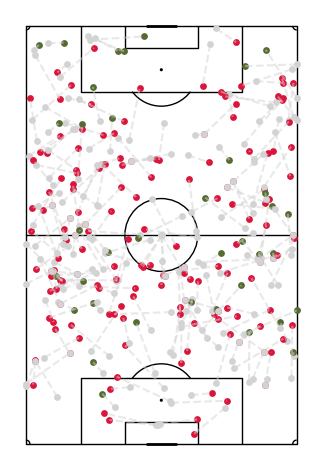

In [105]:
# 패스 길이 별 시각화

pitch = VerticalPitch(pitch_type='uefa', pitch_length=105, pitch_width=68,
              axis=False, label=False, corner_arcs=True,
              pitch_color='white', line_color='black', linewidth=1)

fig, ax = pitch.draw()

for _,rec in df.iterrows():
    if rec['Distance'] == 'short' and rec['teamName'] == 'Czech':
        # pass type
        if rec['outcome'] == 'Successful':
            ax.scatter(
                rec['real_x'], rec['real_y'], s=15, c='lightgrey'
            )
            ax.scatter(
                rec['relative_real_x'], rec['relative_real_y'], s=15, c='crimson'
            )
            ax.plot([rec['real_x'], rec['relative_real_x']],
                    [rec['real_y'], rec['relative_real_y']],
                    color='lightgrey', linestyle='--', alpha=0.5)
        elif rec['outcome'] == 'Unsuccessful' :
            ax.scatter(
                rec['real_x'], rec['real_y'], s=15, c='lightgrey'
            )
            ax.scatter(
                rec['relative_real_x'], rec['relative_real_y'], s=15, c='darkolivegreen'
            )
            ax.plot([rec['real_x'], rec['relative_real_x']],
                    [rec['real_y'], rec['relative_real_y']],
                    color='lightgrey', linestyle='--', alpha=0.5)

#plt.savefig('Italy_longpass.png')
#plt.savefig('Czech_longpass.png')
#plt.savefig('Italy_midpass.png')
#plt.savefig('Czech_midpass.png')
#plt.savefig('Italy_shortpass.png')
#plt.savefig('Czech_shortpass.png')